In [134]:
#%pip install pandas matplotlib seaborn numpy openpyxl scikit-learn

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import sklearn

# Primeiras análises para limpeza e preparação dos dados

In [136]:
# Leitrura e Vizualização das Tabelas do database
base_rh = pd.read_excel("Base_RH.xlsx", sheet_name=None)
display(base_rh.keys())

dict_keys(['Metadados', 'Base'])

In [137]:
base = base_rh['Base']
base

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turnover em uma empresa de tecnologia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,1466,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,...,Não,17,1,17,3,Muito bom,5,2,0,3
1472,1467,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,...,Não,15,1,9,5,Muito bom,7,7,1,7
1473,1468,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,...,Sim,20,1,6,0,Muito bom,6,2,0,3
1474,1469,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,...,Não,14,0,17,3,Bom,9,6,0,8


In [138]:
# Retirar culnas duplicadas
base = base.drop_duplicates()

# Retirar linhas com valores nulos
base = base.dropna()
base

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
5,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
6,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
7,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
8,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
9,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,1466,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,...,Não,17,1,17,3,Muito bom,5,2,0,3
1472,1467,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,...,Não,15,1,9,5,Muito bom,7,7,1,7
1473,1468,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,...,Sim,20,1,6,0,Muito bom,6,2,0,3
1474,1469,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,...,Não,14,0,17,3,Bom,9,6,0,8


In [139]:
# Promover a primeira linha para o cabeçalho
base.columns = base.iloc[0]

# Remover a primeira linha
base = base[1:]

# Resetar o índice
base = base.reset_index(drop=True)
base

5,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,...,Não,17,1,17,3,Muito bom,5,2,0,3
1466,1467,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,...,Não,15,1,9,5,Muito bom,7,7,1,7
1467,1468,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,...,Sim,20,1,6,0,Muito bom,6,2,0,3
1468,1469,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,...,Não,14,0,17,3,Bom,9,6,0,8


In [140]:
# Na colunas Gênero, substituir 'M' por Mulher e 'H' por Homem
base['Gênero'] = base['Gênero'].replace({'M': 'Mulher', 'H': 'Homem'})
base

5,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,Mulher,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,Homem,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,Homem,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,Mulher,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,Homem,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,Homem,Casado,2571,...,Não,17,1,17,3,Muito bom,5,2,0,3
1466,1467,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,Homem,Casado,9991,...,Não,15,1,9,5,Muito bom,7,7,1,7
1467,1468,Não,27,Viaja raramente,4,Ensino Superior,Médio,Homem,Casado,6142,...,Sim,20,1,6,0,Muito bom,6,2,0,3
1468,1469,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,Homem,Casado,5390,...,Não,14,0,17,3,Bom,9,6,0,8


# Separação de colunas, por tipo, para verificação de relevância

In [141]:
# Convertendo colunas para numérico, ignorando erros para tratar células não numéricas
colunas_numericas = ['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
                     'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
                     'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
                     'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe']

base[colunas_numericas] = base[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# O mesmo para categóricas
colunas_categoricas = ['Funcionário_deixou_a_empresa', 'Frequência de Viagens', 
                       'Formação', 'E-Sat', 'Gênero', 'Estado_Civil', 'Faz_hora_extras?', 
                       'Equilibrio_de_Vida']

base[colunas_categoricas] = base[colunas_categoricas].astype('category')
base.columns

Index(['ID', 'Funcionário_deixou_a_empresa', 'Idade', 'Frequência de Viagens',
       'Distância_do_trabalho', 'Formação', 'E-Sat', 'Gênero', 'Estado_Civil',
       'Salário', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Tempo_de_empresa',
       'Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao',
       'Anos_com_o_mesmo_chefe'],
      dtype='object', name=5)

# Análises de Correlação
### É extramente importante análisar primeiramente o poder de correlação entre as variáveis explicativas e a Target para evitar desperdício de tempo

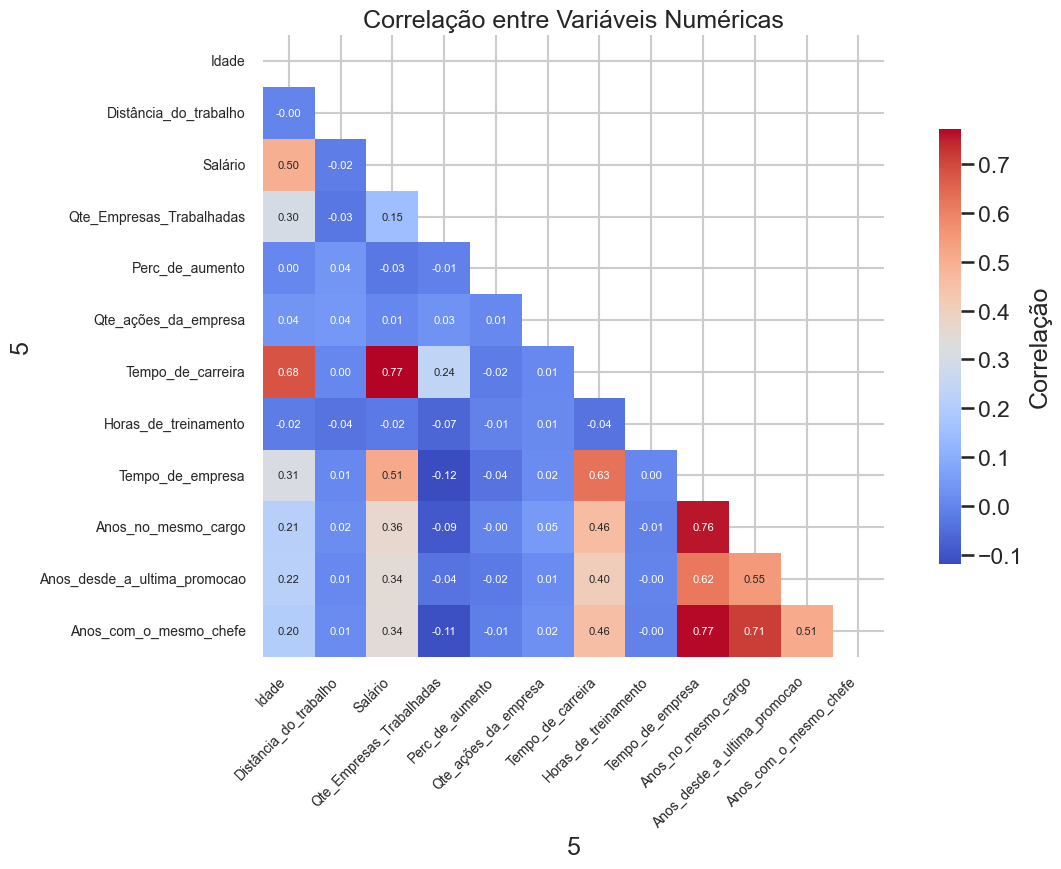

In [142]:
# Criar uma base só de variáveis numéricas
base_numerica = base[colunas_numericas]

# Calcular a matriz de correlação
correlacao = base_numerica.corr()

# Criar uma máscara para a matriz triangular superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Criar a figura
plt.figure(figsize=(14, 10))  # Aumente o tamanho da figura

# Adicionar título
plt.title('Correlação entre Variáveis Numéricas')

# Criar o mapa de calor
heatmap = sns.heatmap(
    correlacao,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar_kws={'shrink': 0.7, 'label': 'Correlação'},
    annot_kws={"size": 8},  # Ajuste o tamanho da fonte das anotações
    square=True
)

# Melhorar a legibilidade dos rótulos dos eixos
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

# Ajustar o layout
plt.tight_layout(pad=3.0)  # Ajuste o espaço ao redor do gráfico

# Mostrar o gráfico
plt.show()

C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\3831910104.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Funcionário_deixou_a_empresa'] = base['Funcionário_deixou_a_empresa'].replace({'Sim': 1, 'Não': 0})
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\3831910104.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  base['Funcionário_deixou_a_empresa'] = base['Funcionário_deixou_a_empresa'].replace({'Sim': 1, 'Não': 0})


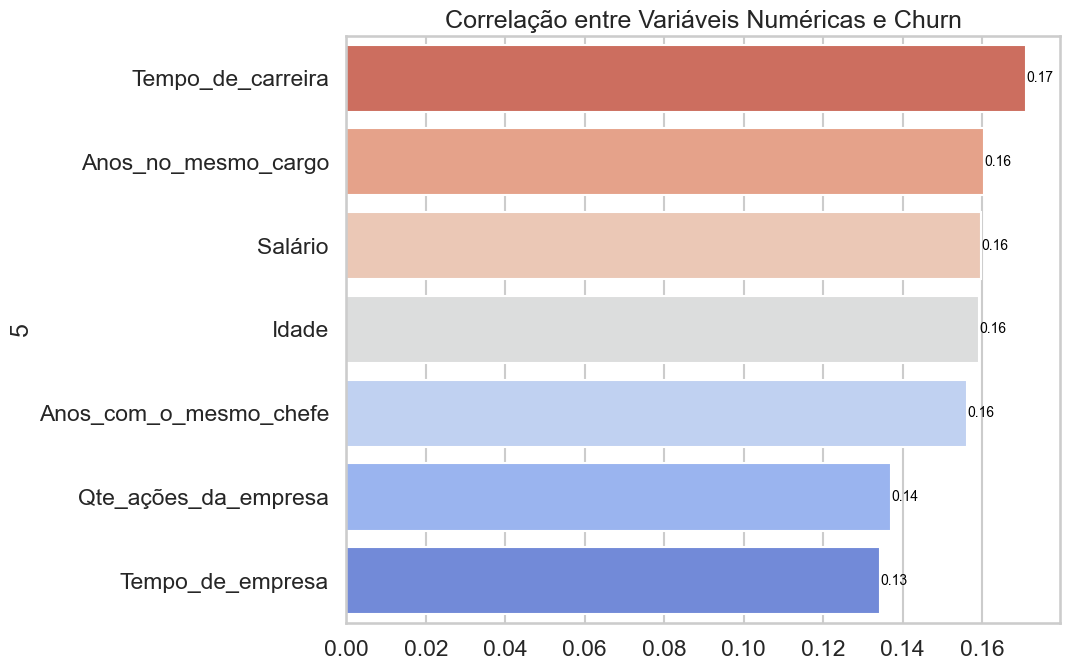

In [143]:
# Converter string para numérico
base['Funcionário_deixou_a_empresa'] = base['Funcionário_deixou_a_empresa'].replace({'Sim': 1, 'Não': 0})

# Analisar a correlação entre as variáveis numéricas e a variável alvo 'Funcionário_deixou_a_empresa'
correlacao_churn = base_numerica.corrwith(base['Funcionário_deixou_a_empresa'], method='pearson')

# Ordenar os valores absolutos da correlação
correlacao_churn = correlacao_churn.abs().sort_values(ascending=False)

# Filtrar apenas as correlações mais fortes
correlacao_churn = correlacao_churn[correlacao_churn >= 0.1]

# Criar a figura
plt.figure(figsize=(12, 8))  # Aumente o tamanho da figura para melhor visualização

# Adicionar título
plt.title('Correlação entre Variáveis Numéricas e Churn')

# Definir a paleta de cores: usar 'coolwarm' invertida
pallete_color = sns.color_palette("coolwarm_r", len(correlacao_churn))

# Criar o gráfico de barras
barplot = sns.barplot(x=correlacao_churn.values, y=correlacao_churn.index, palette=pallete_color, hue=correlacao_churn.index)

# Adicionar valores às barras
for index, value in enumerate(correlacao_churn):
    barplot.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

# Adicionar rótulos as barras
renomear_colunas = {'Funcionário_deixou_a_empresa': 'Deixou a Empresa',
                    'Anos_no_mesmo_cargo': 'Anos no Mesmo Cargo', 'Anos_desde_a_ultima_promocao': 'Anos Desde a Última Promoção',
                    'Qte_ações_da_empresa': 'Qte de Ações da Empresa', 'Tempo_de_empresa': 'Tempo de Empresa',
                    }



# Melhorar o layout
plt.tight_layout(pad=3.0)  # Ajuste o espaço ao redor do gráfico

# Mostrar o gráfico
plt.show()

C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\3746464969.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=iv_series.values, y=iv_series.index, palette=palette_color)


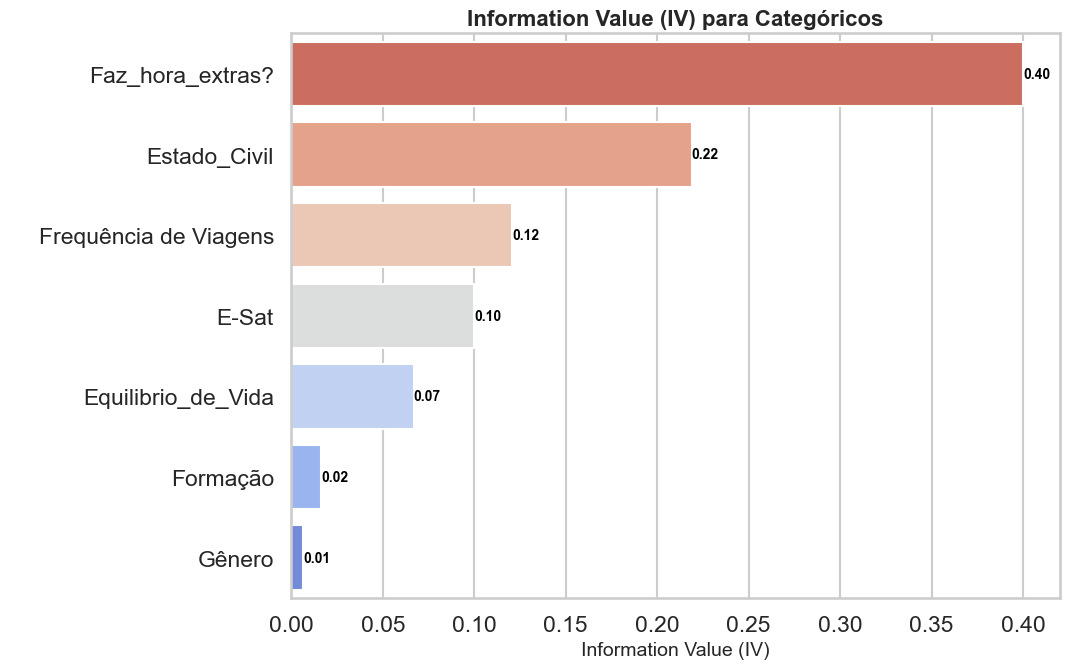

In [144]:
# Criação da funcção para calculo do IV
def calculate_iv(df, feature, Alvo):
    # Verificar se há valores faltantes
    if df[feature].isnull().any() or df[Alvo].isnull().any():
        raise ValueError('Os dados contêm valores ausentes.')

    # Obter os valores únicos da variável alvo
    unique_values = df[Alvo].unique()
    
    # Certifique-se de que temos exatamente dois valores únicos na variável alvo
    if len(unique_values) != 2:
        raise ValueError(f'A variável alvo {Alvo} deve ter exatamente dois valores distintos.')

    value_1, value_2 = unique_values[0], unique_values[1]
    
    # Calcula a distribuição dos eventos
    temp = pd.crosstab(df[feature], df[Alvo], normalize='columns').fillna(0)
    
    temp['Sim_Distribuição'] = temp.get(value_1, 0)
    temp['Não_Distribuição'] = temp.get(value_2, 0)
    
    # Calcular WOE (Weight of Evidence) e evitar divisão por zero
    temp['WoE'] = np.log(temp['Sim_Distribuição'] / temp['Não_Distribuição'].replace(0, np.nan))
    
    # Calcular IV (Information Value)
    temp['IV'] = (temp['Sim_Distribuição'] - temp['Não_Distribuição']) * temp['WoE'].replace(np.nan, 0)
    
    iv_value = temp['IV'].sum()
    
    return iv_value


# Substitua 'base' pelo nome real do seu DataFrame
base_categorica = base[colunas_categoricas]

# Atualize os nomes das colunas para serem mais descritivos
base_categorica = base_categorica.rename(columns=lambda x: x.replace('old_name', 'new_name'))

# Calculando o IV final para cada coluna categórica
iv_values = {}
for coluna in colunas_categoricas[1:]:  # Ignorar a variável alvo
    iv = calculate_iv(base_categorica, coluna, 'Funcionário_deixou_a_empresa')
    iv_values[coluna] = iv

# Converter o dicionário para uma Série do Pandas
iv_series = pd.Series(iv_values)

# Ordenar do maior para o menor
iv_series = iv_series.sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12, 8))  # Tamanho da figura ajustado

# Adicionar título e melhorar a formatação
plt.title('Information Value (IV) para Categóricos', fontsize=16, fontweight='bold')
plt.xlabel('Information Value (IV)', fontsize=14)
plt.ylabel(' ')

# Definir a paleta de cores: usar 'coolwarm' invertida
palette_color = sns.color_palette("coolwarm_r", len(iv_series))

# Criar o gráfico de barras
bar_plot = sns.barplot(x=iv_series.values, y=iv_series.index, palette=palette_color)

# Adicionar valores às barras
for index, value in enumerate(iv_series):
    bar_plot.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Melhorar o layout
plt.tight_layout(pad=3.0)  # Ajuste o espaço ao redor do gráfico

# Mostrar o gráfico
plt.show()

In [145]:
base.head()

5,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,1,41,Viaja raramente,1,Ensino Técnico,Médio,Mulher,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,0,49,Viaja frequentemente,8,Ensino Médio,Alto,Homem,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,1,37,Viaja raramente,2,Ensino Técnico,Muito Alto,Homem,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,0,33,Viaja frequentemente,3,Mestrado,Muito Alto,Mulher,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,0,27,Viaja raramente,2,Ensino Médio,Baixo,Homem,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


# Agora vamos explorar um pouco o perfil dos Churns
### EDA

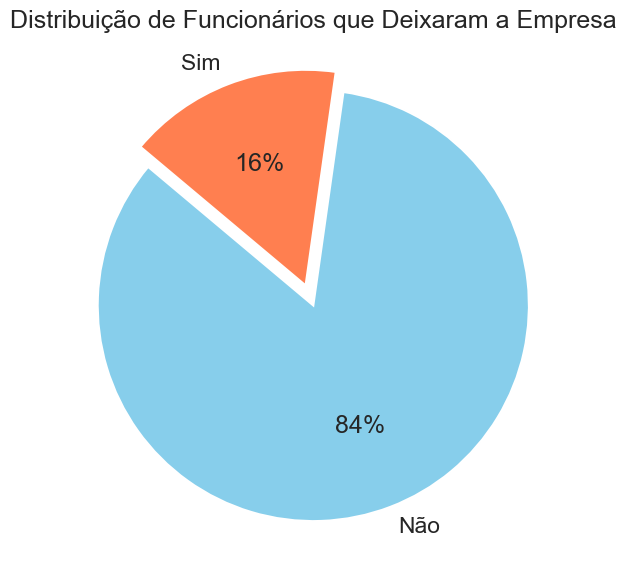

In [146]:
# Vamos analisar a proporção de pessoas que saíram da empresa
churns = base['Funcionário_deixou_a_empresa']
contagem_churns = churns.value_counts()

# Criando a figura
plt.figure(figsize=(7, 7))

# Adicionando título
plt.title('Distribuição de Funcionários que Deixaram a Empresa')

color_sim = 'coral'
color_nao = 'Skyblue'

# Criando a paleta de cores
palette = [color_sim if label == 1 else color_nao for label in contagem_churns.index]

# Criando o parâmetro explode para destacar a fatia 'Sim'
explode = [0.1 if label == 1 else 0 for label in contagem_churns.index]

labels = ['Não' if label == 0 else 'Sim' for label in contagem_churns.index]

# Plotando o gráfico de pizza
plt.pie(contagem_churns, 
        labels=labels, 
        colors=palette, 
        explode=explode,
        autopct='%.0f%%', 
        startangle=140)

# Exibindo o gráfico
plt.show()

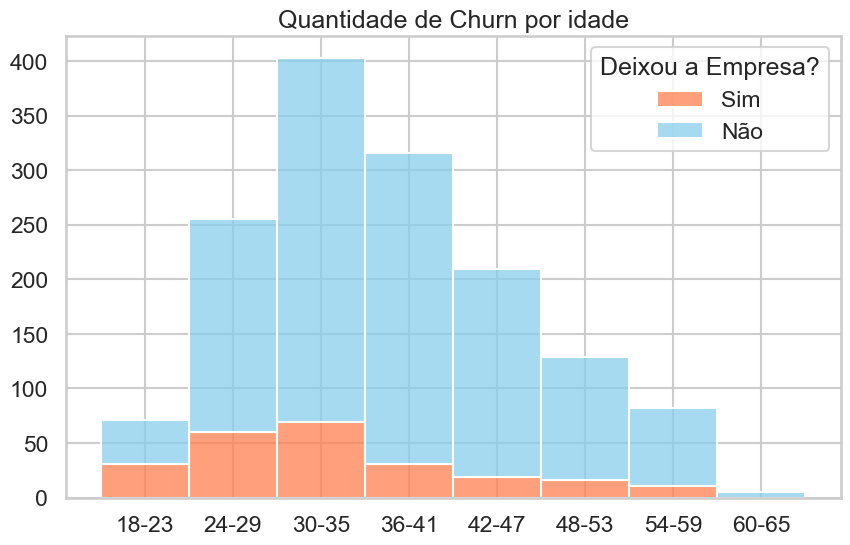

In [147]:
# Criando uma coluna de intervalo de idade
bins = range(18, 72, 6)  # Intervalos de 18 a 72 anos, de 6 em 6 anos

labels = [f'{i}-{i+5}' for i in bins[:-1]]  # Criando rótulos para os intervalos

base['Idade Grupo'] = pd.cut(base['Idade'], bins=bins, labels=labels, right=False)

# Definir a paleta de cores personalizada
palette_color = {0: 'Skyblue', 1:'coral'}

# Plotar o Histograma
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=base, x='Idade Grupo', 
                        hue='Funcionário_deixou_a_empresa',
                        palette=palette_color, 
                        bins=bins, multiple='stack',
                        edgecolor='white')

# Remover os títulos dos eixos X e Y
histplot.set_title('Quantidade de Churn por idade')
histplot.set_xlabel('')
histplot.set_ylabel('')

# mudar legenda
histplot.legend(title='Deixou a Empresa?', labels=['Sim', 'Não'])

# Mostrar o gráfico
plt.show()


C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\3673187423.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=palette_color)


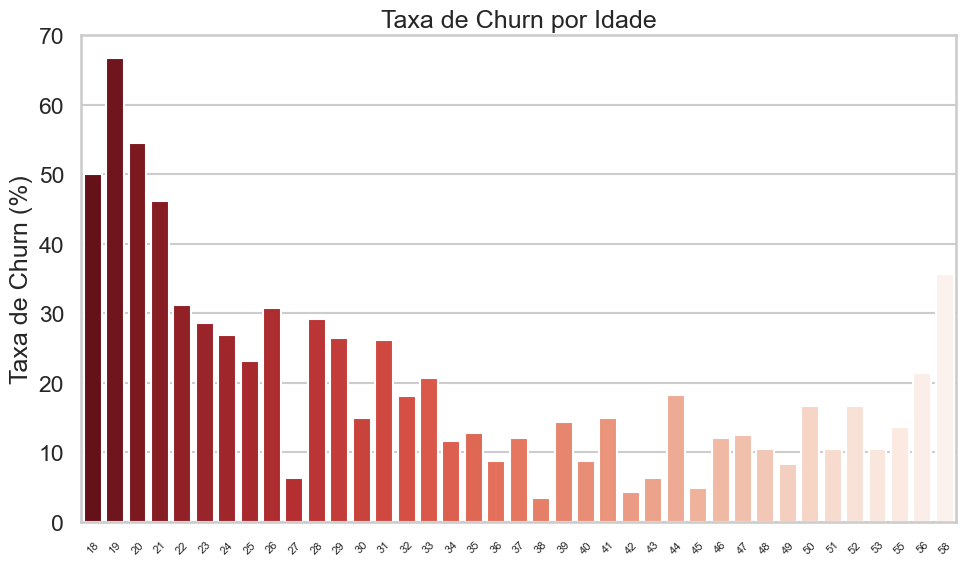

In [148]:
# Função para calcular a taxa de churn (percentual de 'Sim') em cada categoria
def calculate_churn_rate(data, column):
    return data.groupby(column)['Funcionário_deixou_a_empresa'] \
            .value_counts(normalize=True)[:, 1]

# Calculando o percentual de churn em cada categoria
churn_rate = calculate_churn_rate(base, 'Idade')

# Filtrando as faixas de idade que possuem dados (removendo categorias vazias)
churn_rate = churn_rate[churn_rate > 0]

# Convertendo para porcentagem
churn_rate = churn_rate * 100

# Criando a paleta de cores em tons de vermelho
palette_color = sns.color_palette("Reds", len(churn_rate))[::-1]

# Criando a figura
plt.figure(figsize=(10, 6))

# Adicionando título
plt.title('Taxa de Churn por Idade')

# Plotando o gráfico de barras
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=palette_color)

# Adicionando rótulos nos eixos X e Y
plt.xlabel('')
plt.ylabel('Taxa de Churn (%)')
plt.xticks(rotation=45)
plt.xticks(fontsize=8)

# Removendo as categorias de idade que não têm dados

plt.tight_layout()

# Mostrando o gráfico
plt.show()



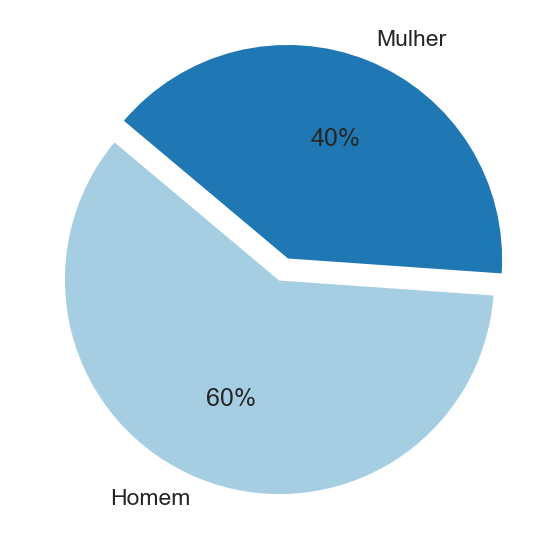

In [151]:
# Vamos analisar o quadrado de Gênero com o pieplot

chunrs = base['Gênero']
contagem_churns = chunrs.value_counts()

# Criando a figura
plt.figure(figsize=(7, 7))

# Adicionando título
plt.title('Distribuição de Churns por Gênero')

# Definindo a paleta de cores e ajustando a transparência

palette_color = sns.color_palette("Paired")

# Plotando o gráfico de pizza
plt.pie(contagem_churns, 
        labels=contagem_churns.index, 
        colors=palette_color, 
        explode=explode,
        autopct='%.0f%%', 
        startangle=140)

# título
plt.title('')
# Exibindo o gráfico
plt.show()

C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\2179417313.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_grupo = base.groupby('Estado_Civil').size().reset_index(name='Total_Count')
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\2179417313.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Estado_Civil') \
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\2179417313.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=agrupar_data, x='Estado_Civil', y='Percentage',


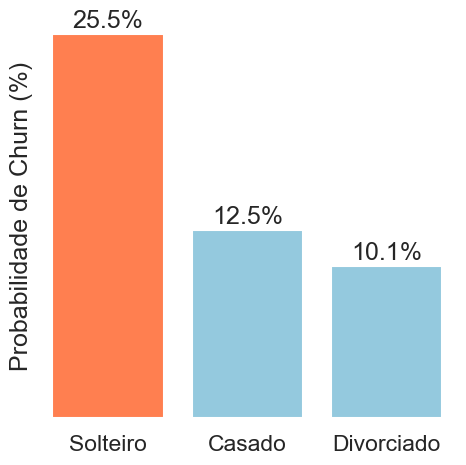

In [ ]:
# Contar o total de funcionários em cada grupo de estado civil
total_por_grupo = base.groupby('Estado_Civil').size().reset_index(name='Total_Count')

# Contar o número de churns (funcionários que deixaram a empresa) em cada grupo de estado civil
churn_por_grupo = base[base['Funcionário_deixou_a_empresa'] == 'Sim'] \
                    .groupby('Estado_Civil') \
                    .size() \
                    .reset_index(name='Churn_Count')

# Mesclar os dados de churn com os totais
agrupar_data = churn_por_grupo.merge(total_por_grupo, on='Estado_Civil')

# Calcular a porcentagem de churn em cada grupo de estado civil
agrupar_data['Percentage'] = (agrupar_data['Churn_Count'] / agrupar_data['Total_Count']) * 100

# Criar gráfico de barras
plt.figure(figsize=(5, 5))

barplot = sns.barplot(data=agrupar_data, x='Estado_Civil', y='Percentage', 
                      color = 'Skyblue' , order=['Solteiro', 'Casado', 'Divorciado'],
                      ci=None, edgecolor="White")

# mudar apenas a cor da coluna de solteiors no barplot
barplot.patches[0].set_facecolor('coral')

# Adicionar título e rótulos
plt.title('')
plt.xlabel('')
plt.ylabel('Probabilidade de Churn (%)')

#tirar o eixo y
plt.yticks([])

# Adicionar rótulos de dados em cima das barras
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), textcoords='offset points')
    
# Tirar o envolvimento do gráfico
sns.despine(left=True, bottom=True)

# Ajuste de layout
plt.tight_layout()



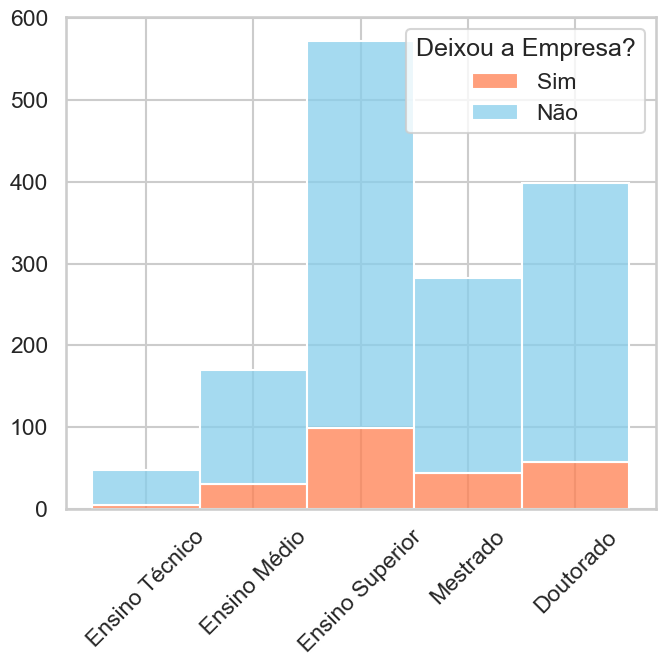

In [ ]:
# Criando a figura
plt.figure(figsize=(7, 7))

# Definindo a paleta de cores 
palette_color = {'Não': 'Skyblue', 'Sim':'coral'}

# Plotando o gráfico pieplot
sns.histplot(data=base, x='Formação', hue='Funcionário_deixou_a_empresa', palette=palette_color, multiple='stack', edgecolor='white')

# ordenar os grupos de formação por Ensino Técnico, Ensino Médio, Ensino Superior, Mestrado e Doutorado
plt.xticks(ticks=range(5), labels=['Ensino Técnico', 'Ensino Médio', 'Ensino Superior', 'Mestrado', 'Doutorado'])

# 

# rotacionar os rótulos
plt.xticks(rotation=45)

# Reposicionar a legenda
plt.legend(title='Deixou a Empresa?', labels=['Sim', 'Não'])

#

# Ajustar os eixos
plt.xlabel('')
plt.ylabel('')
plt.title('')

# ajustar o layout
plt.tight_layout()



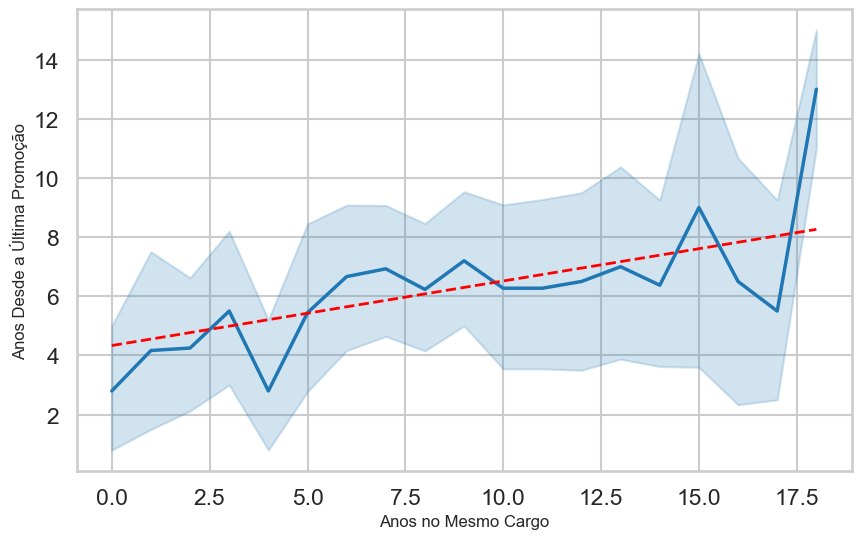

In [ ]:


# configurações estéticas para conversar com a paleta de cores "palette_color"
sns.set_context("talk", font_scale=1)
sns.set_style("whitegrid")

# Verificar e converter tipos de dados
base['Anos_no_mesmo_cargo'] = pd.to_numeric(base['Anos_no_mesmo_cargo'], errors='coerce')
base['Anos_desde_a_ultima_promocao'] = pd.to_numeric(base['Anos_desde_a_ultima_promocao'], errors='coerce')

# Agrupar os dados por Anos_no_mesmo_cargo e Anos_desde_a_ultima_promocao
agrupar_data = base.groupby(['Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao']) \
                    .mean(numeric_only=True) \
                    .reset_index()

# Criar grafico de linha
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=agrupar_data, x='Anos_no_mesmo_cargo', y='Anos_desde_a_ultima_promocao', linewidth=2.5)

# Adicionar linha de tendência
sns.regplot(data=agrupar_data, x='Anos_no_mesmo_cargo', y='Anos_desde_a_ultima_promocao', 
            scatter=False, color='red', line_kws={"linewidth": 2,"linestyle" : "--"}, ci=None)

# Adicionar título e rótulos aos eixos X e Y
lineplot.set_title('')
lineplot.set_xlabel('Anos no Mesmo Cargo', fontsize=12)
lineplot.set_ylabel('Anos Desde a Última Promoção', fontsize=12)

# Ajustar o grid
plt.grid(True)



C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\4083772501.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.cut(base['Tempo_de_empresa'], bins=bins, labels=labels, right=False)) \


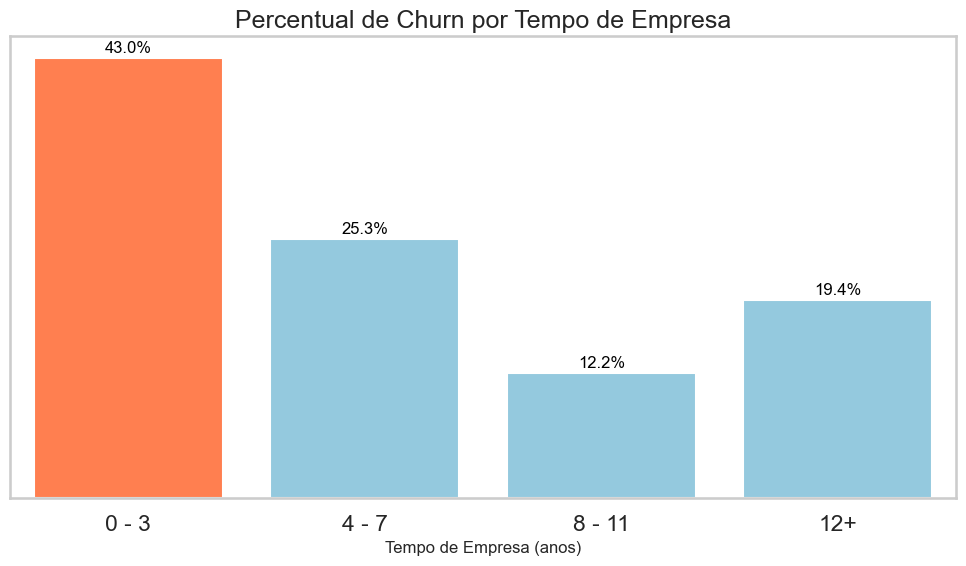

In [ ]:
# Certificar-se de que 'Tempo_de_empresa' é numérico e não contém NaN diretamente no DataFrame original
base['Tempo_de_empresa'] = pd.to_numeric(base['Tempo_de_empresa'], errors='coerce')
base = base.dropna(subset=['Tempo_de_empresa'])  # Remove NaNs antes de usar pd.cut

# Criar intervalos de tempo de empresa de 2 em 2 anos, com o último intervalo capturando o máximo de anos
bins = [0, 3, 6, 9, base['Tempo_de_empresa'].max() + 1]  # Ajustar o último intervalo para cobrir o restante
labels = ['0 - 3', '4 - 7', '8 - 11', '12+']

# Filtrar, agrupar e contar diretamente
agrupar_data = base[base['Funcionário_deixou_a_empresa'] == 'Sim'] \
                    .groupby(pd.cut(base['Tempo_de_empresa'], bins=bins, labels=labels, right=False)) \
                    .size() \
                    .reset_index(name='Count')

# Calcular porcentagens
total_churns = agrupar_data['Count'].sum()
agrupar_data['Percentage'] = (agrupar_data['Count'] / total_churns) * 100

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=agrupar_data, x='Tempo_de_empresa', y='Percentage', errorbar=None, color='Skyblue')

# Mudar a cor da primeira barra para coral
barplot.patches[0].set_facecolor('coral')

# Adicionar os valores de porcentagem no topo das barras
for index, row in agrupar_data.iterrows():
    barplot.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", color='black', ha="center", fontsize=12)

# Remover o eixo Y
barplot.set_ylabel('')  # Remover o rótulo do eixo Y
barplot.set_yticks([])  # Remover as marcações do eixo Y

# Adicionar título e rótulo ao eixo X
barplot.set_title('Percentual de Churn por Tempo de Empresa')
barplot.set_xlabel('Tempo de Empresa (anos)', fontsize=12)

# Ajustar rótulos do eixo X para melhorar a visualização
plt.tight_layout()  # Ajustar layout para evitar cortes no gráfico

# Mostrar o gráfico
plt.show()


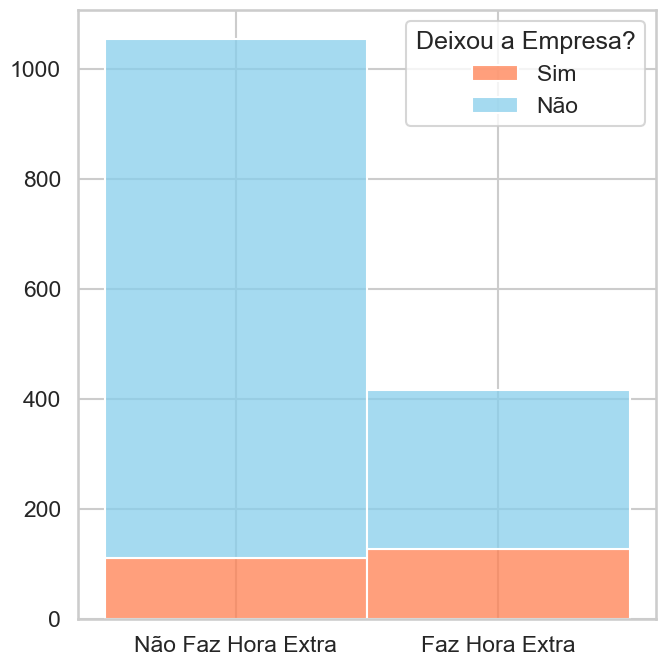

In [ ]:
# Criando a figura
plt.figure(figsize=(7, 7))

# Definindo a paleta de cores 
palette_color = {0: 'Skyblue', 1:'coral'}

# Plotando o gráfico pieplot
sns.histplot(data=base, x='Faz_hora_extras?', hue='Funcionário_deixou_a_empresa', palette=palette_color, multiple='stack', edgecolor='white')

# ordenar 
plt.xticks(ticks=range(2), labels=['Não Faz Hora Extra', 'Faz Hora Extra'])

# rotacionar os rótulos
plt.xticks()

# Reposicionar a legenda
plt.legend(title='Deixou a Empresa?', labels=['Sim', 'Não']) 

# Ajustar os eixos
plt.xlabel('')
plt.ylabel('')
plt.title('')

# ajustar o layout
plt.tight_layout()


C:\Users\gafeb\AppData\Local\Temp\ipykernel_10108\3125661438.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupar_data = base.groupby(['Faz_hora_extras?', 'Funcionário_deixou_a_empresa']).size().unstack()


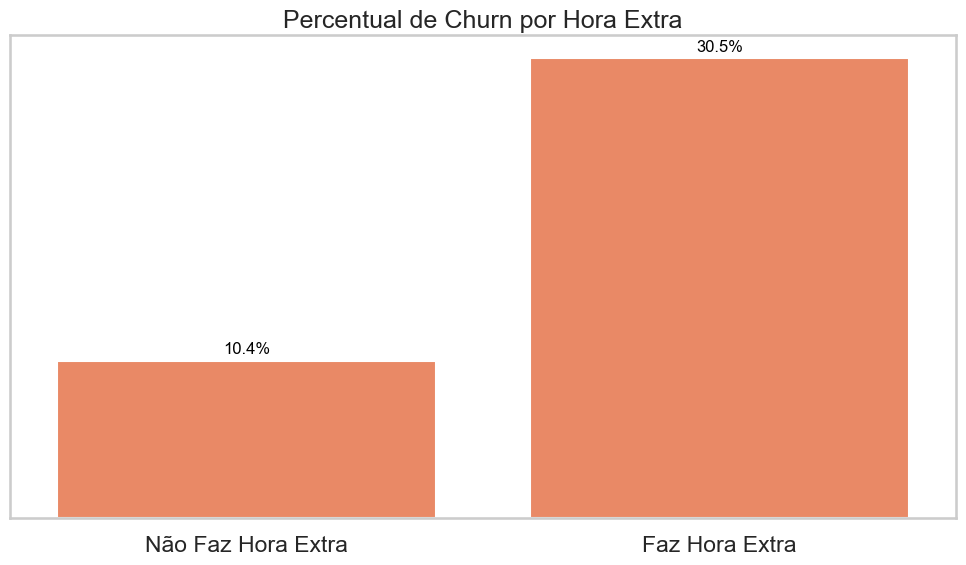

In [ ]:
# Filtrar a base por categoria e calcular o total de funcionários em cada grupo (faz hora extra/não faz hora extra)
agrupar_data = base.groupby(['Faz_hora_extras?', 'Funcionário_deixou_a_empresa']).size().unstack()

# Substituir valores NaN por 0 para evitar erros de cálculo
agrupar_data = agrupar_data.fillna(0)

# Calcular a porcentagem de funcionários que deixaram a empresa em relação ao total de cada grupo
agrupar_data['Percentage'] = (agrupar_data[1] / (agrupar_data[0] + agrupar_data[1])) * 100

# Resetar o índice para preparar os dados para o gráfico
agrupar_data = agrupar_data.reset_index()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=agrupar_data, x='Faz_hora_extras?', y='Percentage', errorbar=None, color='coral')


# Adicionar os valores de porcentagem no topo das barras
for index, row in agrupar_data.iterrows():
    barplot.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", color='black', ha="center", fontsize=12)

# Remover o eixo Y
barplot.set_ylabel('')  # Remover o rótulo do eixo Y
barplot.set_yticks([])  # Remover as marcações do eixo Y

# Adicionar título e rótulo ao eixo X
barplot.set_title('Percentual de Churn por Hora Extra')
barplot.set_xlabel('')

# ordenar 
plt.xticks(ticks=range(2), labels=['Não Faz Hora Extra', 'Faz Hora Extra'])

plt.tight_layout()  # Ajustar layout para evitar cortes no gráfico

# Mostrar o gráfico
plt.show()


# Modelo de Regressão logística

In [152]:
from sklearn.linear_model import LogisticRegression

In [155]:
base.head()

5,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe,Idade Grupo
0,1,1,41,Viaja raramente,1,Ensino Técnico,Médio,Mulher,Solteiro,5993,...,11,0,8,0,Ruim,6,4,0,5,36-41
1,2,0,49,Viaja frequentemente,8,Ensino Médio,Alto,Homem,Casado,5130,...,23,1,10,3,Muito bom,10,7,1,7,48-53
2,3,1,37,Viaja raramente,2,Ensino Técnico,Muito Alto,Homem,Solteiro,2090,...,15,0,7,3,Muito bom,0,0,0,0,36-41
3,4,0,33,Viaja frequentemente,3,Mestrado,Muito Alto,Mulher,Casado,2909,...,11,0,8,3,Muito bom,8,7,3,0,30-35
4,5,0,27,Viaja raramente,2,Ensino Médio,Baixo,Homem,Casado,3468,...,12,1,6,3,Muito bom,2,2,2,2,24-29


In [157]:
# Define estrutura e configurações do modelo
modelo = LogisticRegression( random_state= 42, fit_intercept=True)

# Variaveis explicativas
x = base[['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
          'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
          'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
          'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe']]

# Variavel alvo
y = base['Funcionário_deixou_a_empresa']

# Ajusta o modelo
modelo.fit(x , y)

c:\Users\gafeb\Desktop\Projetos\AnalysisChurn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [158]:
# Obtenção dos coeficientes do modelo
print('Intercepto: {}' .format(modelo.intercept_))
print('Coeficientes: {}' .format(modelo.coef_))

Intercepto: [0.00194228]
Coeficientes: [[-3.57751360e-02  2.99461708e-02 -7.63261048e-05  1.37338348e-01
   1.02044616e-02 -1.22795261e-01 -3.06247196e-02 -7.24787931e-02
   4.07864084e-02 -1.18590394e-01  1.66780737e-01 -1.05771030e-01]]


In [ ]:
# Classificação estimada utilizando métodos do Scikit Learn
base['y_estimado'] = modelo.predict(x)
base.sample(5, random_state=67)


y_estimado
0    1461
1       9
Name: count, dtype: int64

In [ ]:
# CoLuna probabilidade
base['probabilidade'] = modelo.predict_proba(x)[:,1]

In [ ]:
# Realizando o cálculo utilizando Scikit-Learn
from sklearn.metrics import accuracy_score

accuracy_score(y,base['y_estimado'])

0.8380952380952381